In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "Naïve Bayes", "Neighbors", "Linear", "DA", "Network", "Dummy"]

MAE_matrix = np.zeros((8,8))
MAE_stdev = np.zeros((8,8))
CI_matrix = np.zeros((8,8))
CI_stdev = np.zeros((8,8))
CI_sizes = np.zeros((8,8))
CI_sizes_stdev = np.zeros((8,8))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"experiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

SVCSVCMean absolute errors. avg:0.08935518749160422, stdev:0.08037876118275192

SVCTreesMean absolute errors. avg:0.08567063269772536, stdev:0.08348245344454909
SVCNBMean absolute errors. avg:0.09083930730363086, stdev:0.08573331478939691

SVCNeighborsMean absolute errors. avg:0.08349935462167342, stdev:0.08192945155468012

SVCLinearMean absolute errors. avg:0.09080867369850276, stdev:0.07791750012289249
SVCDAMean absolute errors. avg:0.10385967540165789, stdev:0.11308375131820211

SVCnnMean absolute errors. avg:0.0993182164308224, stdev:0.09109145479861329

SVCDummyMean absolute errors. avg:0.08222991826839396, stdev:0.0736400063214161

TreesSVCMean absolute errors. avg:0.09535320905105424, stdev:0.134592990911899
TreesTreesMean absolute errors. avg:0.06195288209803433, stdev:0.08440481568037689

TreesNBMean absolute errors. avg:0.09187505201436241, stdev:0.11720138269723689

TreesNeighborsMean absolute errors. avg:0.08393218888635712, stdev:0.11762495847573283
TreesLinearMean absolut

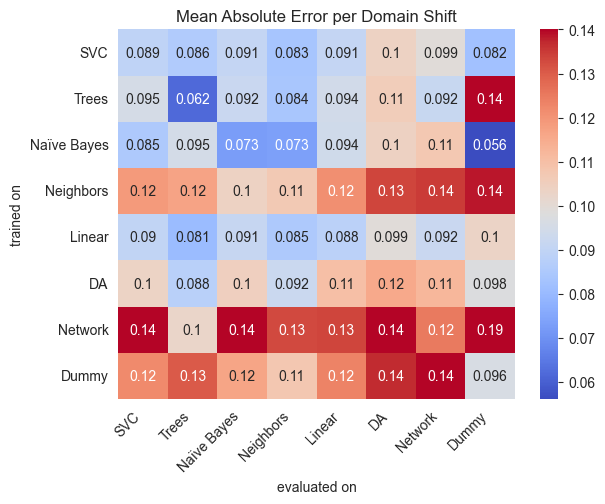

In [3]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Mean Absolute Error per Domain Shift")
plt.show()

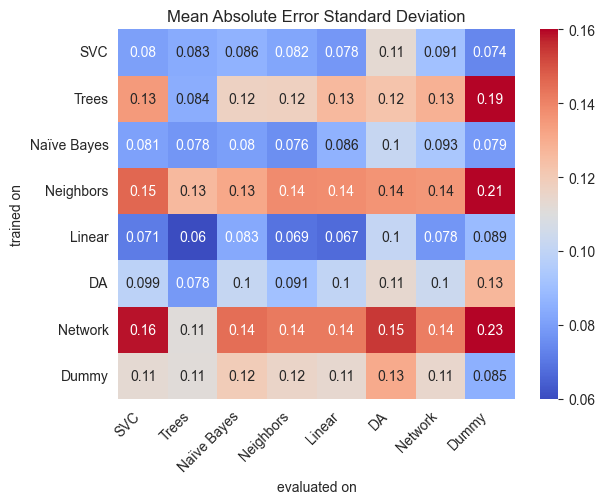

In [4]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Mean Absolute Error Standard Deviation")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\1867282609.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


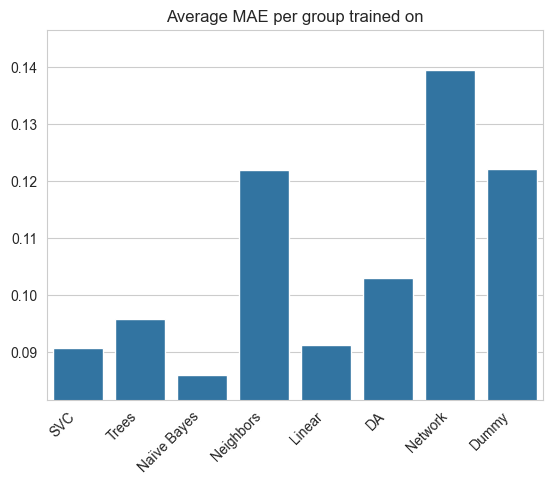

In [5]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Average MAE per group trained on")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\732487993.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


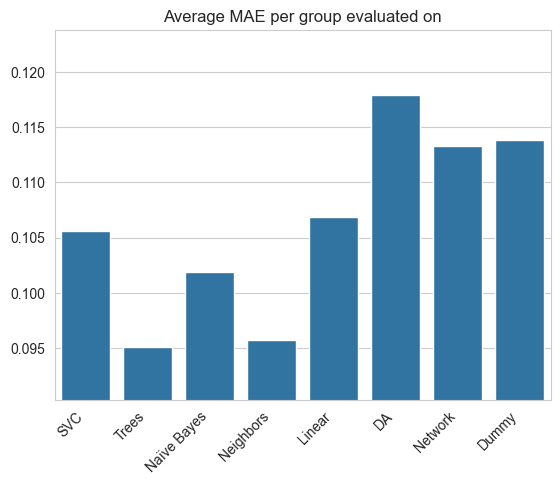

In [6]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Average MAE per group evaluated on")
plt.show()

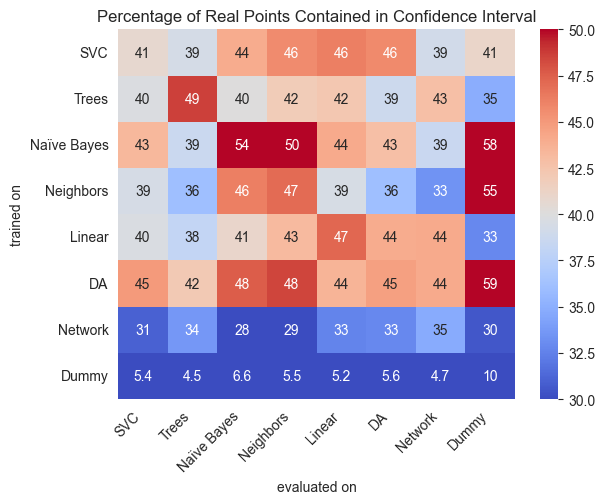

In [13]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            vmax=50,
            vmin=30,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Percentage of Real Points Contained in Confidence Interval")
plt.show()

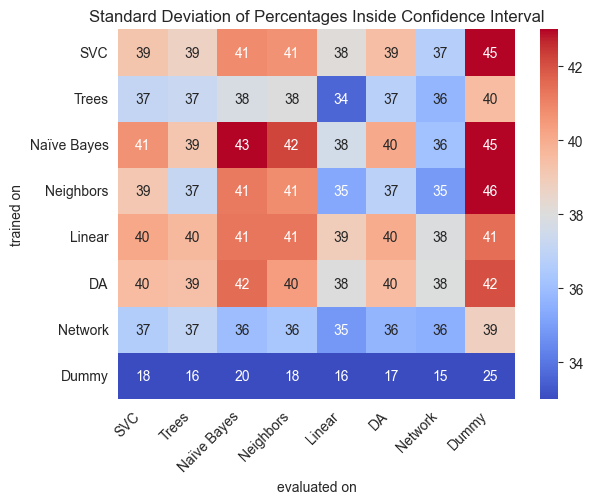

In [14]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Standard Deviation of Percentages Inside Confidence Interval")
plt.show()

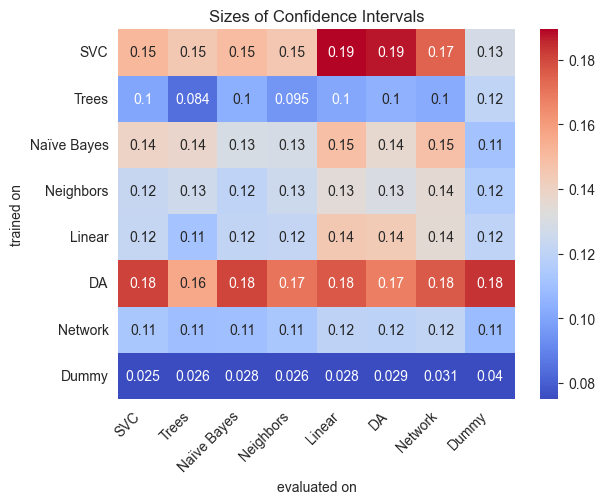

In [18]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Sizes of Confidence Intervals")
plt.show()

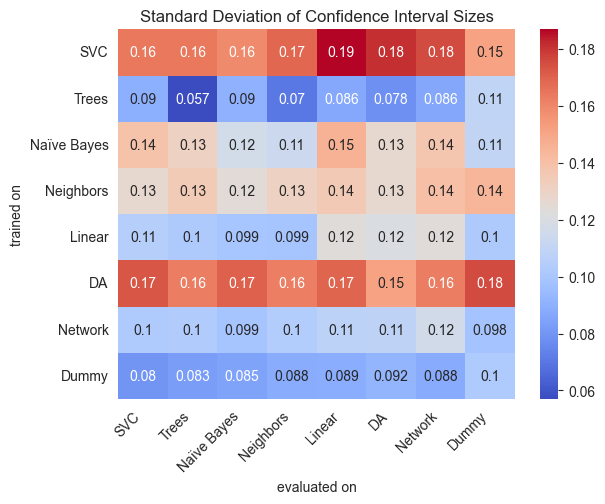

In [10]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Standard Deviation of Confidence Interval Sizes")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_26080\95105973.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


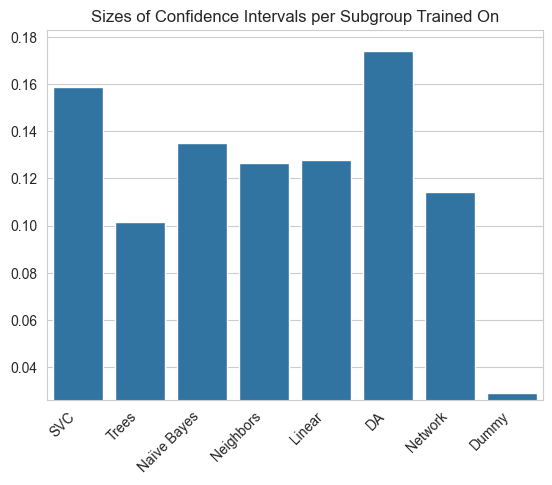

In [11]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plot.set_title("Sizes of Confidence Intervals per Subgroup Trained On")
plt.show()